<a href="https://colab.research.google.com/github/mumin7410/Titanic-Prediction/blob/master/Titanic_prediction_V_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dt = pd.read_csv('test.csv')

In [ ]:
dy = pd.read_csv('gender_submission.csv')

In [ ]:
dy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##Analysis


In [ ]:
#analyze by describing
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Beesley, Mr. Lawrence",male,1601,B96 B98,S
freq,1,577,7,4,644


In [ ]:
#analyze by pivotting
df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


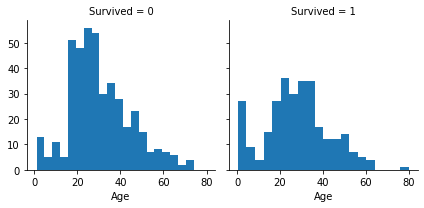

In [ ]:
#analyze by visulize
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist,'Age',bins=20)

##Feature Engineering

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
imp = SimpleImputer(strategy='mean')
imp.fit_transform(df[['Age']])
imp.fit_transform(dt[['Age','Fare']])

In [ ]:
ohn = OneHotEncoder(sparse=False, drop='first')
m = ohn.fit_transform(df[['Sex']])
m2 = ohn.fit_transform(dt[['Sex']])

In [ ]:
dt[['Age','Fare']] = imp.fit_transform(dt[['Age','Fare']])
df[['Age']] = imp.fit_transform(df[['Age']])

In [ ]:
df['Sex'] = m
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dt['Sex'] = m2

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(columns=['PassengerId','Name','Cabin','Ticket','Embarked'], inplace=True)

In [ ]:
from sklearn.preprocessing import scale
scale(df)

array([[-0.78927234,  0.82737724,  0.73769513, ...,  0.43279337,
        -0.47367361, -0.50244517],
       [ 1.2669898 , -1.56610693, -1.35557354, ...,  0.43279337,
        -0.47367361,  0.78684529],
       [ 1.2669898 ,  0.82737724, -1.35557354, ..., -0.4745452 ,
        -0.47367361, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -1.35557354, ...,  0.43279337,
         2.00893337, -0.17626324],
       [ 1.2669898 , -1.56610693,  0.73769513, ..., -0.4745452 ,
        -0.47367361, -0.04438104],
       [-0.78927234,  0.82737724,  0.73769513, ..., -0.4745452 ,
        -0.47367361, -0.49237783]])

##Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
dt.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']]
X_test = dt[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']]
y = df['Survived']
y_test = dy[['Survived']]

In [ ]:
model = XGBClassifier(n_estimators=20)
model.fit(X,y)
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

0.9617224880382775

In [ ]:
o= pd.DataFrame(y_test)

In [ ]:
q = pd.DataFrame(ypred)

In [ ]:
q = pd.DataFrame(y_pred)
q.rename(columns = {0:'Survived'}, inplace=True)

In [ ]:
o.rename(columns = {0:'Survived'}, inplace=True)

In [ ]:
pd.concat([o,q], axis= 1)

,Survived,Survived
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [ ]:
send = pd.concat([dt['PassengerId'],q], axis= 1)
finish = send.set_index('PassengerId')

In [ ]:
from google.colab import files
finish.to_csv('filename2.csv') 
files.download('filename2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>